In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
import pandas as pd

# Load your datasets
dataset1 = pd.read_csv('SDC_converted_AM.csv')
dataset2 = pd.read_csv("SDC_NFM.csv")
dataset3 = pd.read_csv('SDC_converted_WFM.csv')

# Determine the minimum size across the three datasets
min_size = min(len(dataset1), len(dataset2), len(dataset3))

# Take equal-sized samples from each dataset
subset1 = dataset1.sample(n=7000, random_state=42)
subset2 = dataset2.sample(n=9000, random_state=42)
subset3 = dataset3.sample(n=5000, random_state=42)

# Combine all subsets into one
combined_dataset = pd.concat([subset1, subset2, subset3], axis=0, ignore_index=True)

# Shuffle the combined dataset randomly
shuffled_dataset = combined_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the combined shuffled dataset (optional)
shuffled_dataset.to_csv('SDC_dataset.csv', index=False)

print("Datasets combined and shuffled successfully!")


Datasets combined and shuffled successfully!


In [50]:
print(dataset1.shape)
print(dataset2.shape)
print(dataset3.shape)

(3557180, 2)
(286756, 2)
(473372, 2)


In [51]:

print(subset1.shape)
print(subset2.shape)
print(subset3.shape)

(7000, 2)
(9000, 2)
(5000, 2)


In [52]:
df = pd.read_csv('SDC_dataset.csv')
df.head()

,0,Type_of_Signal
0,4.005777e-11,AM
1,1.893531e+14,WFM
2,6.563528e-07,AM
3,6.591305e-10,WFM
4,-4.963174e-01,NFM


In [53]:
df.shape

(21000, 2)

In [54]:
df

,0,Type_of_Signal
0,4.005777e-11,AM
1,1.893531e+14,WFM
2,6.563528e-07,AM
3,6.591305e-10,WFM
4,-4.963174e-01,NFM
...,...,...
20995,-4.882896e-01,NFM
20996,-4.997505e-01,NFM
20997,7.847345e-12,AM
20998,1.622254e-07,AM


In [55]:
print(df.isnull().sum())

0                 0
Type_of_Signal    0
dtype: int64


In [56]:
y = df['Type_of_Signal']

['AM' 'NFM' 'WFM'] [7000 9000 5000]


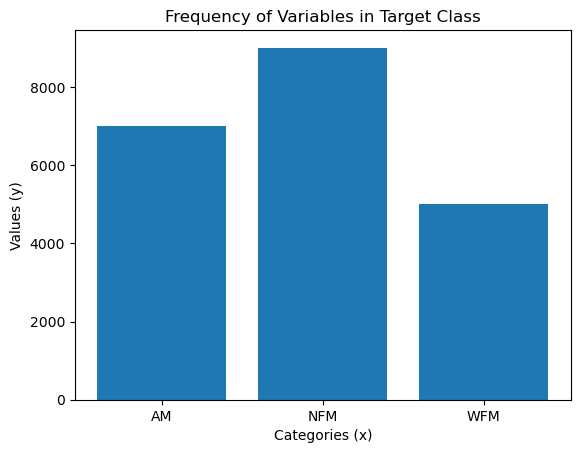

In [57]:
uq,ct = np.unique(y,return_counts=True);
print(uq,ct)
plt.bar(['AM','NFM','WFM'],ct)
plt.title('Frequency of Variables in Target Class')
plt.xlabel('Categories (x)')
plt.ylabel('Values (y)')  # You can choose different colors
plt.show()

In [58]:
# K-Means Clustering and Hierarchical Clustering

Silhouette Score for K-Means: 0.99


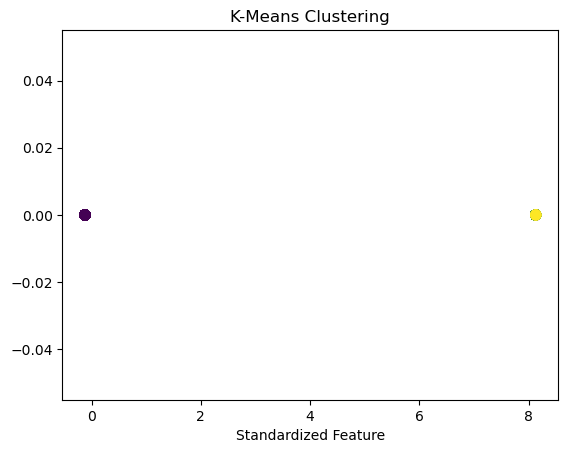

Silhouette Score for Hierarchical Clustering: 0.99


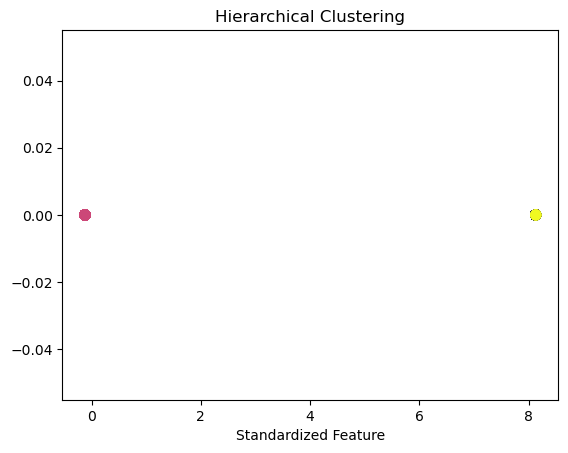

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Extract the feature column
feature = df[['0']]  # Using double brackets to keep it a DataFrame

# Standardize the feature
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(feature)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust 'n_clusters' as needed
kmeans_labels = kmeans.fit_predict(scaled_feature)

# Evaluate with Silhouette Score
silhouette_kmeans = silhouette_score(scaled_feature, kmeans_labels)
print(f"Silhouette Score for K-Means: {silhouette_kmeans:.2f}")

# Plot K-Means Clusters
plt.scatter(scaled_feature, [0] * len(scaled_feature), c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Standardized Feature')
plt.show()

# Hierarchical Clustering (Agglomerative)
hierarchical = AgglomerativeClustering(n_clusters=3)  # Adjust 'n_clusters' as needed
hierarchical_labels = hierarchical.fit_predict(scaled_feature)

# Evaluate with Silhouette Score
silhouette_hierarchical = silhouette_score(scaled_feature, hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical:.2f}")

# Plot Hierarchical Clusters
plt.scatter(scaled_feature, [0] * len(scaled_feature), c=hierarchical_labels, cmap='plasma', s=50)
plt.title('Hierarchical Clustering')
plt.xlabel('Standardized Feature')
plt.show()

In [60]:
# XG Boost

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import xgboost as xgb


# Preprocess the data
# Extract features and target variable
X = df[['0']]  # Feature column(s)
y = df['Type_of_Signal']  # Target variable

# Encode the categorical target values using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optionally, you can also display the confusion matrix to see how well the model performs across classes
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


C:\Users\nithi\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:01:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 84.84%

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.91      0.80      2094
           1       1.00      1.00      1.00      2690
           2       0.80      0.49      0.61      1516

    accuracy                           0.85      6300
   macro avg       0.84      0.80      0.80      6300
weighted avg       0.86      0.85      0.84      6300

Confusion Matrix:
[[1912    0  182]
 [   1 2689    0]
 [ 772    0  744]]


In [66]:
# KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune 'n_neighbors'
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8373015873015873

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75      2094
           1       1.00      1.00      1.00      2690
           2       0.65      0.70      0.68      1516

    accuracy                           0.84      6300
   macro avg       0.81      0.81      0.81      6300
weighted avg       0.84      0.84      0.84      6300



In [74]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Feature and target extraction
X = df[['0']]  # Replace with your actual feature columns if more than one
y = df['Type_of_Signal']

# Encoding the target variable if it's categorical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base learners
base_learners = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svm', SVC(kernel='poly', probability=True, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
]

# Define final model (meta-model)
final_model = LogisticRegression()

# Create the Stacking Classifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=final_model)

# Train the Stacking Classifier
stacking_model.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


C:\Users\nithi\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:02:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\nithi\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:07:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\nithi\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:07:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\nithi\anaconda3\Lib\site-packages\

Accuracy: 0.8506349206349206

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.88      0.80      2094
           1       1.00      1.00      1.00      2690
           2       0.77      0.55      0.64      1516

    accuracy                           0.85      6300
   macro avg       0.83      0.81      0.81      6300
weighted avg       0.85      0.85      0.85      6300



In [265]:
import pandas as pd

# Load your datasets
dataset1 = pd.read_csv('SDC_converted_AM.csv')
dataset2 = pd.read_csv("SDC_NFM.csv")
dataset3 = pd.read_csv('SDC_converted_WFM.csv')

# Determine the minimum size across the three datasets
min_size = min(len(dataset1), len(dataset2), len(dataset3))

# Take equal-sized samples from each dataset
subset1 = dataset1.sample(n=9900, random_state=42)
subset2 = dataset2.sample(n=9000, random_state=42)
subset3 = dataset3.sample(n=10000, random_state=42)

# Combine all subsets into one
combined_dataset = pd.concat([subset1, subset2, subset3], axis=0, ignore_index=True)

# Shuffle the combined dataset randomly
shuffled_dataset = combined_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the combined shuffled dataset (optional)
shuffled_dataset.to_csv('SDC_dataset1.csv', index=False)

print("Datasets combined and shuffled successfully!")


Datasets combined and shuffled successfully!


In [266]:
df = pd.read_csv('SDC_dataset1.csv')

In [267]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Feature and target extraction
X = df[['0']]  # Replace with the correct feature columns
y = df['Type_of_Signal']  # Target column

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 72.57%

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.38      0.49      2986
           1       1.00      1.00      1.00      2721
           2       0.57      0.83      0.67      2963

    accuracy                           0.73      8670
   macro avg       0.75      0.73      0.72      8670
weighted avg       0.74      0.73      0.71      8670

